In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [23]:
headername=['Mpg','Cylinders','Displacement','Horsepower','Weight','Acceleration','Model','Origin','Car']

In [24]:
data = pd.read_csv('auto-mpg.data',names=headername,delimiter="\s+")

In [25]:
data.head()

,Mpg,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin,Car
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Mpg           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    object 
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model         398 non-null    int64  
 7   Origin        398 non-null    int64  
 8   Car           398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [27]:
data.Horsepower.unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [28]:
data.Horsepower= data.Horsepower.str.replace('?', 'NaN',regex=True).astype(float)
data.Horsepower.fillna(data.Horsepower.mean(),inplace=True)
data.Horsepower = data.Horsepower.astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Mpg           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    int32  
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model         398 non-null    int64  
 7   Origin        398 non-null    int64  
 8   Car           398 non-null    object 
dtypes: float64(4), int32(1), int64(3), object(1)
memory usage: 26.6+ KB


In [29]:
model=pd.DataFrame(data, columns = ['Mpg', 'Acceleration'])

In [30]:
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 2]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

In [31]:
def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 2]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

In [32]:
def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, points, learning_rate)
    return [b, m]


In [33]:
points = model

points[:10]



,Mpg,Acceleration
0,18.0,12.0
1,15.0,11.5
2,18.0,11.0
3,16.0,12.0
4,17.0,10.5
5,15.0,10.0
6,14.0,9.0
7,14.0,8.5
8,14.0,10.0
9,15.0,8.5


In [34]:
points=points.reset_index().values

In [35]:
points[:10]

array([[ 0. , 18. , 12. ],
       [ 1. , 15. , 11.5],
       [ 2. , 18. , 11. ],
       [ 3. , 16. , 12. ],
       [ 4. , 17. , 10.5],
       [ 5. , 15. , 10. ],
       [ 6. , 14. ,  9. ],
       [ 7. , 14. ,  8.5],
       [ 8. , 14. , 10. ],
       [ 9. , 15. ,  8.5]])

In [36]:
# Initialize the hyper parameters
learning_rate = 0.0001
initial_b = 0 # initial y-intercept guess
initial_m = 0 # initial slope guess
num_iterations = 1000

In [37]:
points[1,1]

15.0

In [38]:
#Call function
print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b,initial_m,compute_error_for_line_given_points(initial_b, initial_m, points)))


Starting gradient descent at b = 0, m = 0, error = 613.8712562814071


In [39]:
[b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
   

In [40]:
 print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))

After 1000 iterations b = 0.12252253313266287, m = 1.4931509862180814, error = 50.8852731718681


In [41]:
points[1]

array([ 1. , 15. , 11.5])

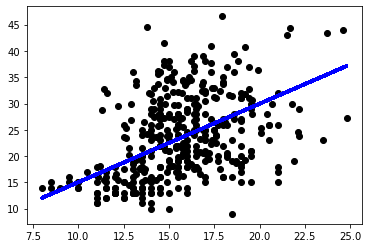

In [42]:
# Plot outputs
for i in range(0, len(points)):
        x = points[i, 2]
        y = points[i, 1]
        plt.scatter(x,y,color='black')

        plt.plot(model.Acceleration, (1.4920263083109613 * model.Acceleration + 0.1211874783663623), color='blue',linewidth=3)

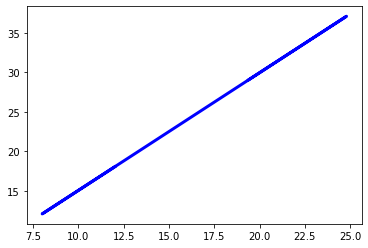

In [43]:
plt.plot(model.Acceleration, (1.4920263083109613 * model.Acceleration + 0.1211874783663623), color='blue',linewidth=3)